In [1]:
import ROOT
import os
from my_utils import *
set_width_max_of_jupyterpad()

from fst import *
import numpy as np
import db 
import pasttrec_ctrl as ptc
import baseline_calib

data_dir = make_data_dir()

#from ROOT import gInterpreter, gSystem
#gInterpreter.ProcessLine('#include "/workdir/my_event.h"')

import tdc_daq as td


print(data_dir)
for my_board in db.board_list():
    db.enable_board(my_board)    
    #db.unset_standby_board(my_board)
    db.set_standby_board(my_board)    
    #db.disable_board(my_board)
    ptc.init_board_by_name(my_board)
    ptc.set_threshold_for_board_by_name(my_board,5)

ptc.init_active_boards()
td.enable_tdc_channels_of_active_boards()

#set spike rejection for pasttrec tdc channels:
#setup = db.get_setup_json()
#setup["global_settings"]["spike_rejection"] = 33
#print( setup["global_settings"]["spike_rejection"] )
#db.write_setup_json(setup)
#db.write_go4_settings_h()


Welcome to JupyROOT 6.14/04


/workdir/jupyter/tot_data_taking_data


In [2]:
##################################################
##   clear data dir, copy root file or measure fresh    ##
##################################################
import hameg_trb 


#data set 2
#all boards on threshold 30, take_data(time=480)
#spike rejection = 15 ns
#HV=1600
#ptime=10
#pt_gain_list = [ 1, 2, 4 ]
#pt_threshold_list = [ 8, 10, 13, 15, 18, 20, 25, 30, 35, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#########################################################################
#data set 3
#all other boards standby,  take_data(time=960)
#spike rejection = 15 ns
#HV=1600
#ptime=15
#pt_gain_list = [ 1, 2, 4 ]
#pt_threshold_list = [ 8, 10, 13, 15, 18, 20, 25, 30, 35, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#########################################################################
#data set 4
#all other boards standby,  take_data(time=480)
#spike rejection = 30 ns
#HV=16002
#ptime=15
#pt_gain_list = [ 1, 2, 4 ]
#pt_threshold_list = [ 8, 10, 13, 15, 18, 20, 25, 30, 35, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#########################################################################
#data set 5
#all other boards standby,  take_data(time=300)
#spike rejection = 15 ns
#HV=1600
#ptime=15
#pt_gain_list = [ 4 ]
#pt_threshold_list = [ 10, 20, 30, 50 ]
#board_list = [ "0009","0010","0011", "0002","0004","0007"]
#boards_scan_list = ['0010', '0015', '0016', '0017', '0020', '0023', '0030', '0029', '0027', '0025', '0026', '0022', '0003', '0014', '0021', '0018', '0006', '0028', '0008', '0005']

#########################################################################
dataset_id = 120
# 49 same like 48 but with noise shield again on board 007 = 010
# 50, boards on scan for gain 2,4 thr 35 board with shield
# 57, boards on scan for gain 2,4 thr 35 boards 101, 108
# 59, full paramete scan gain+peakingtime+threshold boards 101, 108
# 60,repeat 57: boards on scan for gain 2,4 thr 35 boards 101, 108
# 61 boards on scan for gain 2,4 thr 15,20,30,50 boards 101, 108
# 62 threshold scan for gain 1,2,4 pktime 10,15,20 boards 101, 108

# 66 threshold scan for gain 2 pktime 15 boards 101, 110  
# 67 boards on scan for gain 2,4 thr 20,30 boards 101, 110
# 68, repeat of 67 with Ferrit on TDF cable 110 ( boards on scan for gain 2,4 thr 30 boards 101, 110 )
# 69 threshold scan for gain 1,2,4 pktime 15 boards 101, 110  
# 69+ boards on scan for gain 4 thr 35,
# 70 boards on scan for gain 4 thr 30,31,32 three different boards activate sequences(random) boards 101, 110
# 71 threshold scan for gain 4 pktime 15 boards 101, 110 , all other boards inactive 2 round Ferrites  on LVDS cable
# 73 threshold scan for gain 4 pktime 15 boards 101, 110 , all other boards active 4 flat Ferrites on LVDS cable
# 74 repeat 70 now with  4 flat Ferrites on LVDS cable
# 75 repeat 70 now with gain=2  4 flat Ferrites on LVDS cable
# 77 threshold scan for gain 4 pktime 15 boards 110, 007 
# 78 boards on scan for  gain 4 pktime 15 boards 110, 007 
# 79 boards on scan for  gain 2 pktime 15 boards 110, 007 

# 51 board with shield, parameter scan
# 52, boards on scan for gain 2 thr 25,30 board with shield
# MDC settings:
HV=1600
# set data taking time in seconds for each step, minimum 30s is needed to initialize and get some trigger from dabc stream
data_taking_duration = 2000
# set PASTTREC settings:
# peakintime: 10, 15, 20 (ns)
# gain: 1, 2, 4
# threshold: 1,2,3 .... 127
# spike rejection 10 ,15, 20 ,33,99 all int possible (ns)

#ptime_list = [ 10, 15, 20 ]
ptime_list = [ 15 ]
# set PASTTREC default threshold for the measurement
#pt_gain_list = [ 1, 2, 4 ]
pt_gain_list = [ 4]  
pt_threshold_list = [ 35 ]
#pt_threshold_list = [ 10,15,20,25,30,35,40,50,70]
#pt_threshold_list = [30]
spike_reject_list = [20]
#spike_reject_list = [10, 15, 20, 30]

#board_list = [ "0009","0010","0011", "0002","0004","0007", "0015","0016","0017" ]
board_list = ["0900", "0901","0902","0903","0904", "0905","0906","0907","0009","0007","0011","0110"]
boards_to_activate_on_one_step = 1
#time trend:
trendduration = 1*60*60
stepduration = 60

name = board_list[0]

from cw_pasttrec_functions import *
## define sequence of boards to activate in scan.
#boards_scan_list = board_list
#boards_scan_list = generate_neighbouring_FPC_board_list(name)
# boards_scan_list = generate_neighbouring_w_board_list(name)
#boards_scan_list = db.board_list()
boards_scan_list = ['0900']
# boards_scan_list = ['0110', '0011', '0010', '0015', '0016', '0009', '0017', '0020', '0023', '0030', '0110', '0029', '0002', '0027', '0101', '0025', '0004', '0026', '0022', '0003', '0014', '0021', '0018', '0104', '0006', '0028', '0103', '0102', '0008', '0005']
#boards_scan_list = ['0010', '0101', '0011', '0002', '0009', '0004', '0015', '0027', '0016', '0025', '0017', '0026', '0022', '0020', '0003', '0023', '0030', '0014', '0021', '0029', '0018', '0104', '0103', '0006', '0008', '0102', '0028']
#boards_scan_list = ['0010', '0011', '0009', '0015', '0016', '0017', '0020', '0023', '0030', '0029', '0101', '0002', '0004', '0027', '0025', '0026', '0022', '0003', '0014', '0021', '0018', '0104', '0006', '0028']
# boards_scan_list = ['0010', '0009', '0011', '0015', '0016', '0017', '0020', '0023', '0030', '0029', '0027', '0002', '0004', '0025', '0026', '0022', '0003', '0014', '0021', '0018', '0006', '0028', '0008', '0005']
#boards_scan_list = ['0014', '0005', '0021', '0022', '0025', '0003', '0026', '0027', '0008', '0004', '0002', '0101', '0029', '0030', '0028', '0023', '0020', '0017', '0016', '0006', '0015', '0010', '0011', '0009']


data_file_list = []
current_list = []
volt_list = []
current_list2 = []
volt_list2 = []

#for my_board in db.board_list():
#            db.unset_standby_board(my_board)
message = " total measurement time estimated [h] = {:.2f}".format(data_taking_duration/3600*len(spike_reject_list)*len(ptime_list)*len(pt_gain_list)*len(pt_threshold_list)*len(boards_scan_list)/boards_to_activate_on_one_step)
print(message)
alert(message)
#for timestep in range(0,ntimesteps):
for spike_reject in spike_reject_list:
 setup = db.get_setup_json()
 setup["global_settings"]["spike_rejection"] = spike_reject
 db.write_setup_json(setup)
 db.write_go4_settings_h()
 for ptime in ptime_list: 
  for pt_gain in pt_gain_list:     
   for pt_threshold in pt_threshold_list:    
    for my_board in db.board_list():
        db.set_standby_board(my_board)
    import random
    random.shuffle(boards_scan_list)
    iboard = -boards_to_activate_on_one_step
    for p in range(0,int(len(boards_scan_list)/boards_to_activate_on_one_step)): 
        iboard += boards_to_activate_on_one_step
        for my_board in db.board_list():
            for p_act in range(0,boards_to_activate_on_one_step):
                if my_board == boards_scan_list[iboard+p_act]:
                    db.unset_standby_board(my_board)
                    db.enable_board(my_board)
        # enable data taking boards:
        for my_board in board_list:
            db.unset_standby_board(my_board)
            db.enable_board(my_board)
        td.enable_tdc_channels_of_active_boards()
        ptc.init_boards_by_name(db.board_list())    
        #ptc.init_active_boards()
        ptc.init_boards_by_name(board_list, ptime, pt_gain, pt_threshold)   
                        # init_boards_by_name(board_list,pktime=-1,gain=-1,threshold=-1):
        for name in board_list:
            #baseline_calib.set_baselines_individual(name, [-15]*16 )   
            ptc.set_threshold_for_board_by_name(name,pt_threshold)
        print(hameg_trb.get_curr(3), hameg_trb.get_curr(4))
        #take_data(events=20000)
        # uses only trigger by TDC 0350 channel 49 as the reference. 
        # either Scitillator inpot or puls generator input to this channel, needs to be used
        take_data(time=data_taking_duration)
        import time as time
        time.sleep(4)
        
        
        current_list += [ hameg_trb.get_curr(3) ]
        volt_list += [ hameg_trb.get_volt(3) ]
        current_list2 += [ hameg_trb.get_curr(4) ]
        volt_list2 += [ hameg_trb.get_volt(4) ] 

        print(hameg_trb.get_curr(3), hameg_trb.get_curr(4))
     # clear_data_dir()
        data_file = "{:s}/ID{:d}_HV{:d}V_ptime_{:d}_thr_{:d}_gain_{:d}_boardsON_{:d}_sr_{:d}.root".format(data_dir,dataset_id,HV,ptime,pt_threshold,pt_gain,iboard,spike_reject)
        print(data_file)
        #os.system("cp /workdir/tree_out.root {:s}".format(data_file))
        os.system("cp /workdir/joint_tree.root {:s}".format(data_file))
        data_file_list.append(data_file)

  # write data file list to disk, for later analysis
import pickle
with open("{:s}/datasetID_{:d}_list.pickle".format(data_dir,dataset_id), 'wb') as fp:
    pickle.dump(data_file_list, fp)  
print(fp)

 total measurement time estimated [h] = 0.56


4.819 0.0002
4.813 0.0002
/workdir/jupyter/tot_data_taking_data/ID120_HV1600V_ptime_15_thr_35_gain_4_boardsON_0_sr_20.root
<_io.BufferedWriter name='/workdir/jupyter/tot_data_taking_data/datasetID_120_list.pickle'>
GO4-*> Reading library: libGo4UserAnalysis  
GO4-*> Close of TUserSource  
GO4-*> Create default analysis with processor class TFirstStepProcessor  
GO4-*> Use class TStreamEvent as output event  
GO4-*> Welcome to Go4 Analysis Framework Release v6.0.1 (build 60001) !  
GO4-*> Analysis: Added analysis step Analysis  
GO4-*> Main: starting analysis in batch mode ...    
GO4-!> Fail to open AutoSave file Go4AutoSave.root  
GO4-*> Analysis LoadObjects: Failed to load from file Go4AutoSave.root  
Use MBS source port 6790
f_evt_get_open for STREAM: port=6790 timeout=1  
GO4-*> Factory: Create input event for MBS  
GO4-*> Event MbsEvent101 has source localhost:6790 class: TGo4MbsStream  
GO4-*> Factory: Create event processor Processor  
GO4-*> Create TFirstStepProcessor Processor

>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reached
>WARNING: Status-Bit(s) have been set:
>WARNING: CommonStatusBits: 0x0000, Channel#3 StatusBits: 0x0000
>WARNING:    COM_EndpointReached: no endpoint has been reache

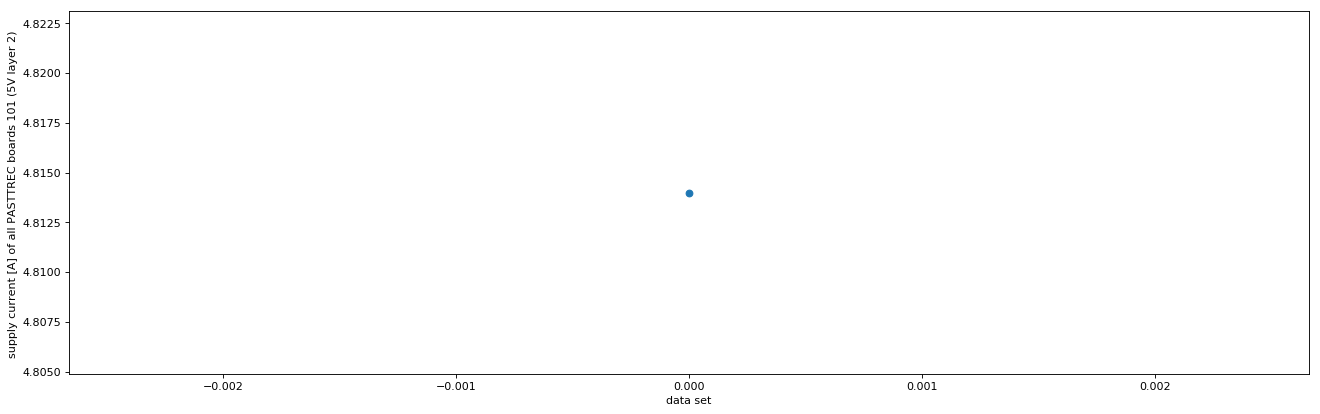

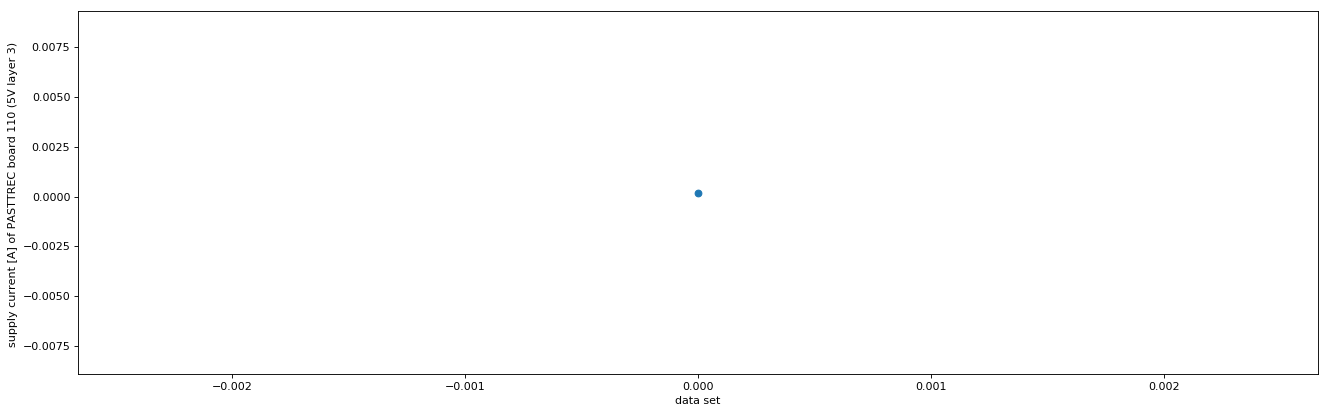

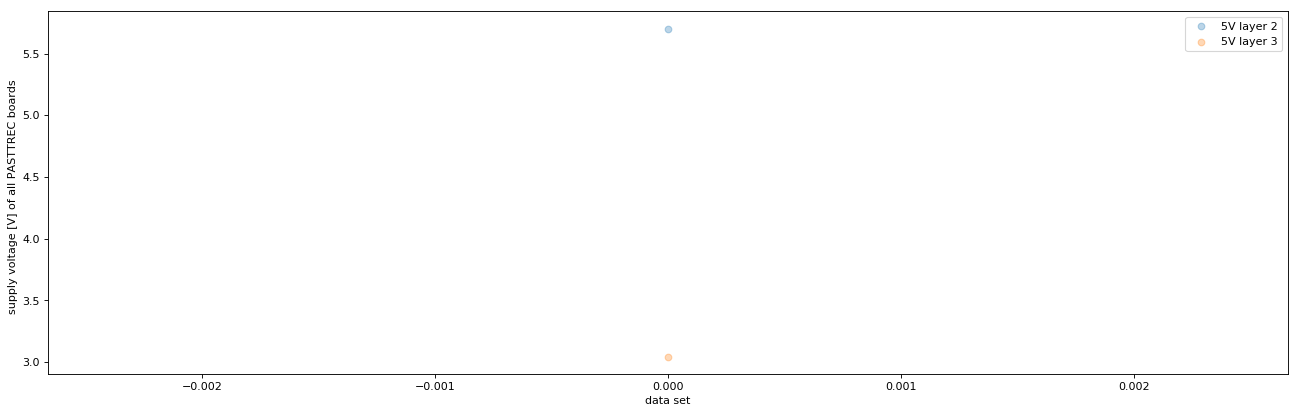

In [3]:

from matplotlib import pyplot as plt
%matplotlib inline
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')        
plt.scatter(range(0,len(current_list)),current_list)    
plt.xlabel("data set")
plt.ylabel("supply current [A] of all PASTTREC boards 101 (5V layer 2) ")
plt.show()
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k') 
plt.scatter(range(0,len(current_list2)),current_list2)        
plt.xlabel("data set")
plt.ylabel("supply current [A] of PASTTREC board 110 (5V layer 3) ")
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k') 
plt.scatter(range(0,len(volt_list)),volt_list,alpha=0.3,label = "5V layer 2")
plt.scatter(range(0,len(volt_list2)),volt_list2,alpha=0.3,label = "5V layer 3")      
plt.xlabel("data set")
plt.ylabel("supply voltage [V] of all PASTTREC boards  ")
plt.legend()
plt.show()

In [4]:
#archive(label="ID_{:d}_tot_data_powersupply_trend".format(dataset_id))
print(data_file_list)

['/workdir/jupyter/tot_data_taking_data/ID120_HV1600V_ptime_15_thr_35_gain_4_boardsON_0_sr_20.root']


<_io.BufferedWriter name='/workdir/jupyter/tot_data_taking_data/datasetID_120_list.pickle'>
data file   , tot_mostprob signalcounts noisecounts sn_ratio significance
/workdir/jupyter/tot_data_taking_data/ID120_HV1600V_ptime_15_thr_35_gain_4_boardsON_0_sr_20.root
ID120_HV1600V_ptime_15_thr_35_gain_4_boardsON_0_sr_20. |  35.0 |  1332.0 |  22253.0 |  0.06 |  8.67


Warning in <TClass::Init>: no dictionary for class Event is available
Warning in <TClass::Init>: no dictionary for class Hit is available


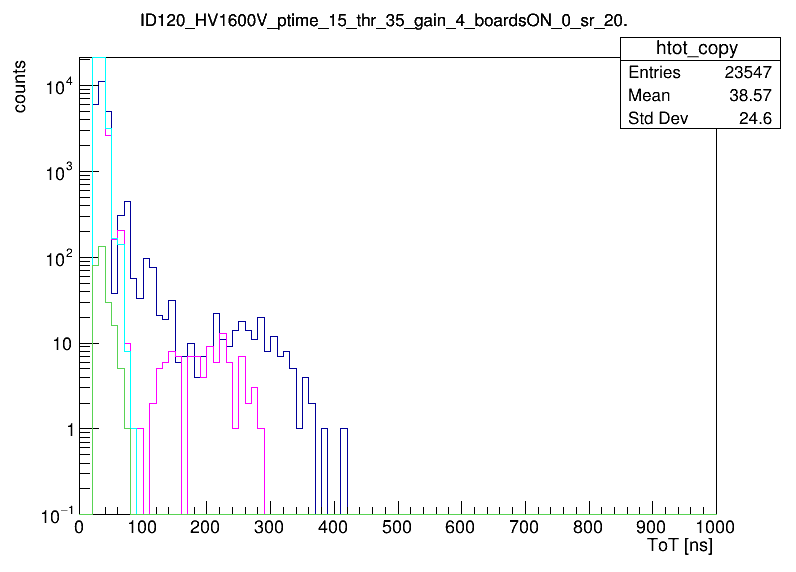

In [5]:
import pickle
with open("{:s}/datasetID_{:d}_list.pickle".format(data_dir,dataset_id), 'wb') as fp:
    pickle.dump(data_file_list, fp)  
print(fp)

##################################################
##               slurp root file                ##
##################################################
 
#with open ('/workdir/jupyter/tot_data_taking_data/HV1600V_ptime_15_threshold_50_gain_4_boardsON_23.rootlist.pickle', 'rb') as fp:
 #   data_file_list = pickle.load(fp)
    

#f = ROOT.TFile("/workdir/tree_out.root".format(data_dir))
#tree = f.Get("TDC_1503")
#print("data entries TDC_1503: " + str(tree.GetEntries()))
i = -1
clist = [None]*100
print("data file   ,", "tot_mostprob", "signalcounts", "noisecounts", "sn_ratio", "significance")
    
for data_file in data_file_list:
    i += 1
    print(data_file)
    f = ROOT.TFile("{:s}".format(data_file))
    #f = ROOT.TFile("{:s}".format("/workdir/tree_out.root"))    
    tree = f.Get("joint_tree")
    #tree = f.Get("TDC_1800")
    #print("data entries: " + str(tree.GetEntries()))
    ## plot data:
    clist[i] = ROOT.TCanvas("myCanvasName"+str(i),str(data_file),800,600)
    #tree.Draw("tot>>htot(300,0,300)","chan > 150300 && chan < 150316")
    #tree.Draw("tot>>htot2(300,0,300)","chan > 035300 && chan < 035316","same")   
    #tree.Draw("tot>>htot(300,0,1000)","chan > 00") 
    
    #tree = f.Get("TDC_1503")
    #tree.Draw("tot>>htot2(300,0,1000)","chan > 00") 
    tree.Draw("tot>>htot2(100,0,1000)","chan > 180000 && chan < 180099")  
    tree.Draw("tot>>htot3(100,0,1000)","chan > 180100 && chan < 180199")  
    tree.Draw("tot>>htot4(100,0,1000)","chan > 180300 && chan < 180399")  
    tree.Draw("tot>>htot(100,0,1000)","chan > 150300 && chan < 150399") 
    clist[i].Draw()
    htot = f.Get("htot")
    htot2 = f.Get("htot2")
    htot3 = f.Get("htot3")
    htot4 = f.Get("htot4")    
    clist[i].SetLogy()
    htot.GetXaxis().SetTitle("ToT [ns]")
    htot.GetYaxis().SetTitle("counts")
    htot.SetTitle(data_file.strip("workdir/jupyter/tot_data_taking_data"))
    htot2.SetLineColor(6)
    htot.SetMinimum(0.1)
    htot.DrawCopy("")
    htot2.DrawCopy("same")
    htot3.SetLineColor(7)
    htot3.DrawCopy("same")
    htot4.SetLineColor(8)
    htot4.DrawCopy("same")
    
    tot_mostprob = htot.GetXaxis().GetBinCenter(htot.GetMaximumBin())
    
    signalcounts  = htot.Integral(htot.FindBin(50),htot.GetNbinsX())
    noisecounts   = htot.Integral(1,htot.FindBin(50))
    if noisecounts == 0:
        sn_ratio = -1
        significance = -1
    else:
        sn_ratio = signalcounts/noisecounts
        significance = signalcounts/np.sqrt(signalcounts+noisecounts)
    print(  htot.GetTitle() , "| ",  tot_mostprob,"| ", signalcounts,"| ", noisecounts,"| ", "{:.2f}".format(sn_ratio),"| ", "{:.2f}".format(significance))
    

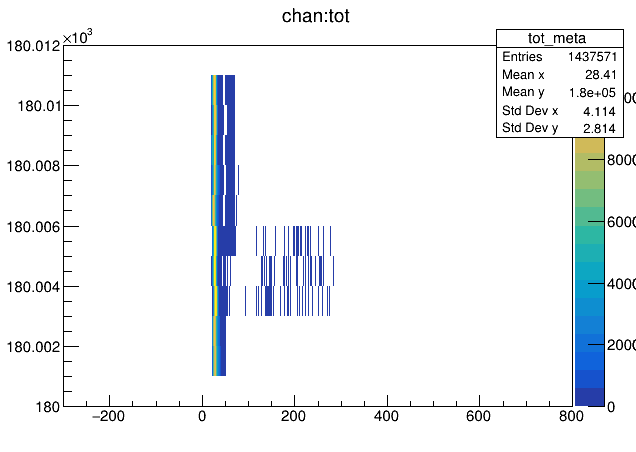

In [6]:
##################################################
##             overview TDC 0x0351              ##
##################################################
c = ROOT.TCanvas("myCanvasName","The Canvas Title",640,480)

tdc=1800
disp_channels = 12
#tree.Draw("chan:t1","","lego2")
tree.Draw("chan:tot>>tot_meta(1000,-300,800,{:d},{:d},{:d})".format(disp_channels,tdc*100,tdc*100+disp_channels),"","colz")
c.Draw()